In [1]:
from lib.skin_disease.data_module import DataModule
from lib.skin_disease.model_factory import get_model_and_preprocess
from lib.skin_disease.trainer import Trainer


def train(model_name, epochs=10):
    model, preprocess = get_model_and_preprocess(model_name)

    dm = DataModule(
        data_dir='../../dataset/skin_diseases/train',
        img_size=preprocess.resize_size[0],
        mean=preprocess.mean,
        std=preprocess.std,
    )
    dm.setup()

    train_files = {
        dm.train_ds.subset.dataset.samples[i][0] for i in dm.train_ds.subset.indices
    }
    val_files = {
        dm.val_ds.subset.dataset.samples[i][0] for i in dm.val_ds.subset.indices
    }

    overlap = train_files.intersection(val_files)
    print(f'중복된 파일 개수: {len(overlap)}')  # 0이 나와야 정상입니다.
    overlap = train_files.intersection(val_files)
    print(f'중복된 파일 개수: {len(overlap)}')  # 0이 나와야 정상입니다.
    train_loader, val_loader = dm.get_loaders()

    trainer = Trainer(model, train_loader, val_loader, model_name, lr=1e-4)
    trainer.run(epochs=epochs)

    return model, dm, trainer

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

from lib.skin_disease.test_model import test_model


def report(model, dm, trainer):
    test_transform = transforms.Compose(
        [
            transforms.Resize((dm.img_size, dm.img_size)),
            transforms.ToTensor(),
            transforms.Normalize(dm.mean, dm.std),
        ]
    )

    test_dataset = datasets.ImageFolder(
        root='../../dataset/skin_diseases/test', transform=test_transform
    )
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

    test_model(model, test_loader, test_dataset.classes, trainer.device)

✅ Data Loaded: Train(1196), Val(298)
중복된 파일 개수: 0
중복된 파일 개수: 0


Epoch 0: 100%|██████████| 38/38 [00:15<00:00,  2.41it/s, loss=0.9951]


✨ Epoch 0: Val Acc 83.56% | Best 83.56%


Epoch 1: 100%|██████████| 38/38 [00:15<00:00,  2.47it/s, loss=0.3544]


✨ Epoch 1: Val Acc 90.60% | Best 90.60%


Epoch 2: 100%|██████████| 38/38 [00:15<00:00,  2.47it/s, loss=0.3813]


✨ Epoch 2: Val Acc 92.28% | Best 92.28%


Epoch 3: 100%|██████████| 38/38 [00:15<00:00,  2.49it/s, loss=0.2857]


✨ Epoch 3: Val Acc 94.63% | Best 94.63%


Epoch 4: 100%|██████████| 38/38 [00:15<00:00,  2.48it/s, loss=0.2188]


✨ Epoch 4: Val Acc 97.32% | Best 97.32%


Epoch 5: 100%|██████████| 38/38 [00:15<00:00,  2.48it/s, loss=0.0439]


✨ Epoch 5: Val Acc 98.32% | Best 98.32%


Epoch 6: 100%|██████████| 38/38 [00:15<00:00,  2.48it/s, loss=0.1018]


✨ Epoch 6: Val Acc 96.98% | Best 98.32%


Epoch 7: 100%|██████████| 38/38 [00:15<00:00,  2.49it/s, loss=0.0293]


✨ Epoch 7: Val Acc 97.99% | Best 98.32%


Epoch 8: 100%|██████████| 38/38 [00:15<00:00,  2.48it/s, loss=0.3942]


✨ Epoch 8: Val Acc 98.66% | Best 98.66%


Epoch 9: 100%|██████████| 38/38 [00:15<00:00,  2.48it/s, loss=0.0092]


✨ Epoch 9: Val Acc 98.99% | Best 98.99%

📊 상세 성능 리포트:
              precision    recall  f1-score   support

        acne       0.45      0.50      0.48        10
       eksim       0.19      0.30      0.23        10
      herpes       0.80      0.80      0.80        10
        panu       0.75      0.90      0.82        10
     rosacea       0.00      0.00      0.00        10

    accuracy                           0.50        50
   macro avg       0.44      0.50      0.47        50
weighted avg       0.44      0.50      0.47        50



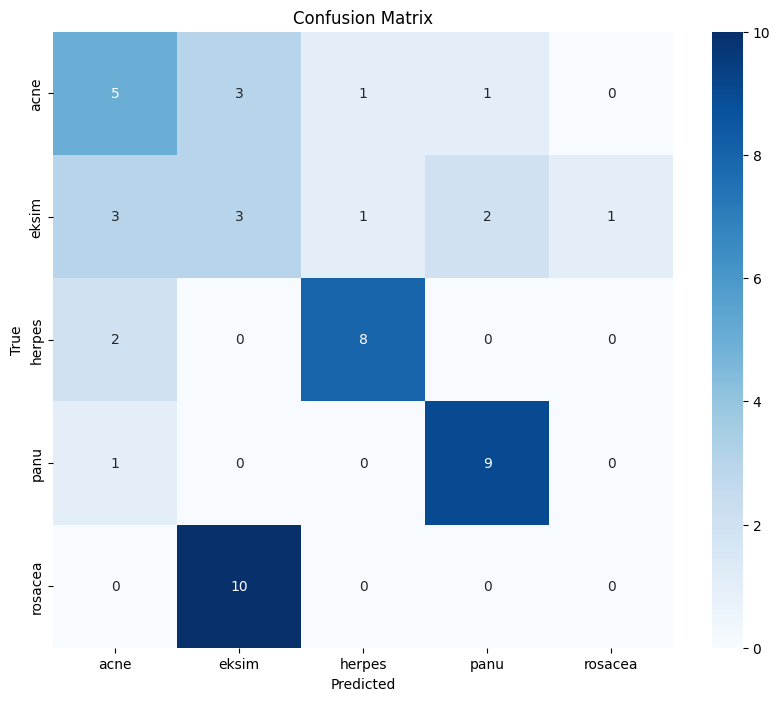

In [3]:
model, dm, trainer = train('resnet34')
report(model, dm, trainer)

ConvNeXt(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
    )
    (1): Sequential(
      (0): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=96, out_features=384, bias=True)
          (4): GELU(approximate='none')
          (5): Linear(in_features=384, out_features=96, bias=True)
          (6): Permute()
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=

Epoch 0: 100%|██████████| 38/38 [00:19<00:00,  1.95it/s, loss=0.6863]


✨ Epoch 0: Val Acc 79.53% | Best 79.53%


Epoch 1: 100%|██████████| 38/38 [00:19<00:00,  1.98it/s, loss=0.4202]


✨ Epoch 1: Val Acc 92.28% | Best 92.28%


Epoch 2: 100%|██████████| 38/38 [00:19<00:00,  1.98it/s, loss=0.4160]


✨ Epoch 2: Val Acc 94.30% | Best 94.30%


Epoch 3: 100%|██████████| 38/38 [00:19<00:00,  1.99it/s, loss=0.0726]


✨ Epoch 3: Val Acc 95.64% | Best 95.64%


Epoch 4: 100%|██████████| 38/38 [00:19<00:00,  1.98it/s, loss=0.2720]


✨ Epoch 4: Val Acc 98.32% | Best 98.32%


Epoch 5: 100%|██████████| 38/38 [00:19<00:00,  1.98it/s, loss=0.0387]


✨ Epoch 5: Val Acc 98.66% | Best 98.66%


Epoch 6: 100%|██████████| 38/38 [00:19<00:00,  1.95it/s, loss=0.0120]


✨ Epoch 6: Val Acc 98.99% | Best 98.99%


Epoch 7: 100%|██████████| 38/38 [00:19<00:00,  1.98it/s, loss=0.1115]


✨ Epoch 7: Val Acc 98.99% | Best 98.99%


Epoch 8: 100%|██████████| 38/38 [00:19<00:00,  1.98it/s, loss=0.0160]


✨ Epoch 8: Val Acc 98.99% | Best 98.99%


Epoch 9: 100%|██████████| 38/38 [00:19<00:00,  1.96it/s, loss=0.0269]


✨ Epoch 9: Val Acc 99.33% | Best 99.33%

📊 상세 성능 리포트:
              precision    recall  f1-score   support

        acne       0.55      0.60      0.57        10
       eksim       0.33      0.50      0.40        10
      herpes       0.60      0.90      0.72        10
        panu       1.00      0.70      0.82        10
     rosacea       1.00      0.20      0.33        10

    accuracy                           0.58        50
   macro avg       0.70      0.58      0.57        50
weighted avg       0.70      0.58      0.57        50



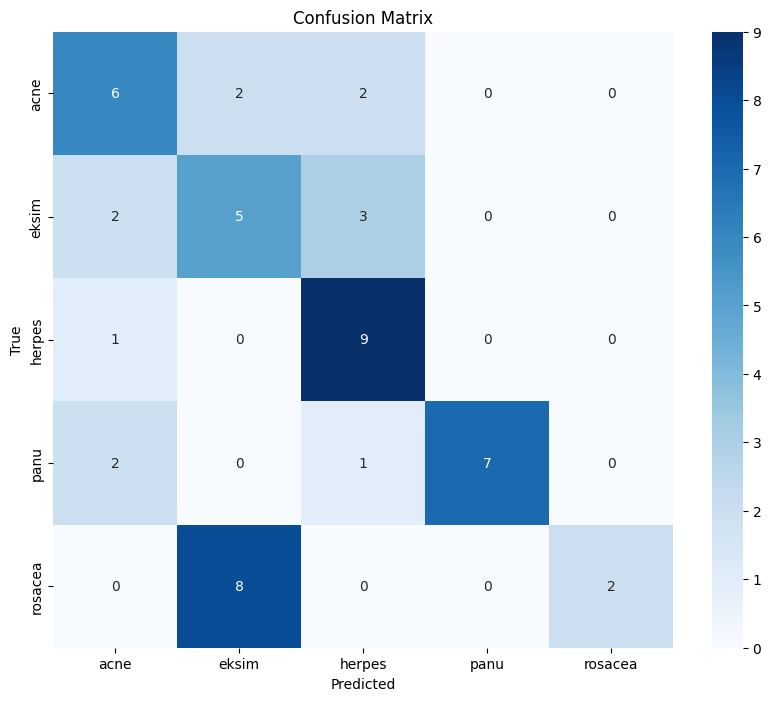

In [6]:
model, dm, trainer = train('convnext_tiny')
report(model, dm, trainer)

Downloading: "https://download.pytorch.org/models/efficientnet_v2_s-dd5fe13b.pth" to /Users/kyungpyokim/.cache/torch/hub/checkpoints/efficientnet_v2_s-dd5fe13b.pth


100%|██████████| 82.7M/82.7M [00:01<00:00, 54.1MB/s]


✅ Data Loaded: Train(1196), Val(298)
중복된 파일 개수: 0
중복된 파일 개수: 0


Epoch 0: 100%|██████████| 38/38 [00:26<00:00,  1.44it/s, loss=1.4581]


✨ Epoch 0: Val Acc 39.93% | Best 39.93%


Epoch 1: 100%|██████████| 38/38 [00:21<00:00,  1.79it/s, loss=1.5273]


✨ Epoch 1: Val Acc 55.37% | Best 55.37%


Epoch 2: 100%|██████████| 38/38 [00:21<00:00,  1.79it/s, loss=1.3382]


✨ Epoch 2: Val Acc 61.74% | Best 61.74%


Epoch 3: 100%|██████████| 38/38 [00:21<00:00,  1.79it/s, loss=1.2141]


✨ Epoch 3: Val Acc 65.77% | Best 65.77%


Epoch 4: 100%|██████████| 38/38 [00:21<00:00,  1.80it/s, loss=1.3097]


✨ Epoch 4: Val Acc 65.77% | Best 65.77%


Epoch 5: 100%|██████████| 38/38 [00:31<00:00,  1.20it/s, loss=1.2136]


✨ Epoch 5: Val Acc 66.44% | Best 66.44%


Epoch 6: 100%|██████████| 38/38 [00:31<00:00,  1.22it/s, loss=1.1390]


✨ Epoch 6: Val Acc 68.12% | Best 68.12%


Epoch 7: 100%|██████████| 38/38 [00:29<00:00,  1.29it/s, loss=1.1992]


✨ Epoch 7: Val Acc 67.45% | Best 68.12%


Epoch 8: 100%|██████████| 38/38 [00:27<00:00,  1.39it/s, loss=1.0736]


✨ Epoch 8: Val Acc 69.46% | Best 69.46%


Epoch 9: 100%|██████████| 38/38 [00:26<00:00,  1.45it/s, loss=1.0873]


✨ Epoch 9: Val Acc 70.81% | Best 70.81%

📊 상세 성능 리포트:
              precision    recall  f1-score   support

        acne       0.50      0.20      0.29        10
       eksim       0.25      0.20      0.22        10
      herpes       0.38      1.00      0.56        10
        panu       0.83      0.50      0.62        10
     rosacea       0.17      0.10      0.12        10

    accuracy                           0.40        50
   macro avg       0.43      0.40      0.36        50
weighted avg       0.43      0.40      0.36        50



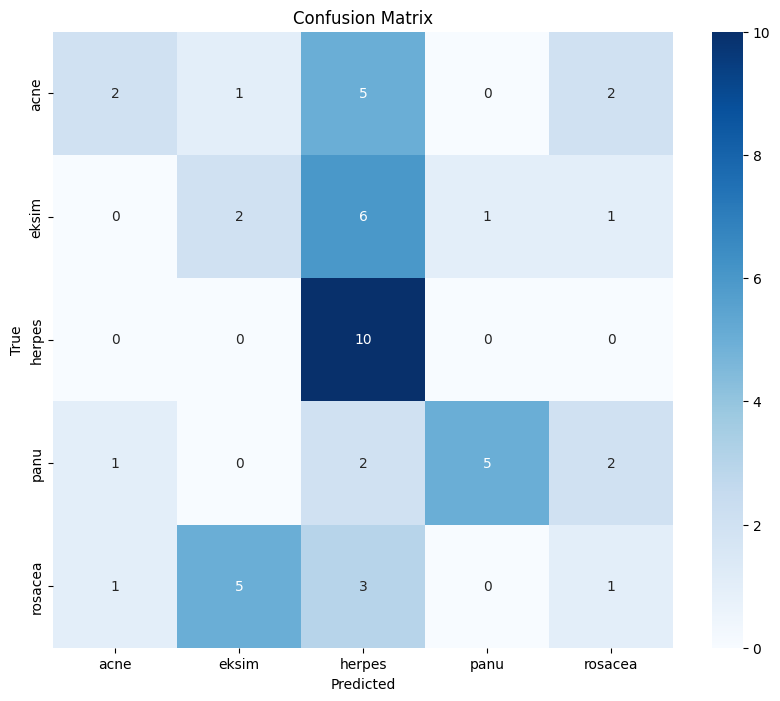

In [7]:
model, dm, trainer = train('efficientnet_v2_s')
report(model, dm, trainer)

In [ ]:
# import numpy as np
# from matplotlib import pyplot as plt


# def visualize_results(model, test_loader, classes, device, n=5):
#     model.eval()
#     plt.figure(figsize=(15, 5))

#     # 로더에서 한 배포 가져오기
#     imgs, labels = next(iter(test_loader))
#     imgs, labels = imgs.to(device), labels.to(device)
#     outputs = model(imgs)
#     preds = outputs.argmax(dim=1)

#     for i in range(n):
#         img = imgs[i].cpu().numpy().transpose((1, 2, 0))
#         # 정규화 되돌리기 (시각화용)
#         mean = np.array([0.485, 0.456, 0.406])
#         std = np.array([0.229, 0.224, 0.225])
#         img = std * img + mean
#         img = np.clip(img, 0, 1)

#         plt.subplot(1, n, i + 1)
#         plt.imshow(img)
#         plt.title(f'True: {classes[labels[i]]}\nPred: {classes[preds[i]]}')
#         plt.axis('off')
#     plt.show()


# test_loader = []

# visualize_results(model, test_loader, dm.classes, trainer.device)